# Proyek Analisis Data: Nama dataset
- Nama: Henry Trenggana
- Email: trenggana70@gmail.com
- Id Dicoding: henryyy

## Menentukan Pertanyaan Bisnis

- Apa penyebab terbesar dari pencemaran udara di kota Dongsi?
- Apa yang dapat dilakukan oleh masyarakat Dongsi untuk mengurangi pencemaran udara di wilayah nya?
- Bagaimana kualitas udara di kota Dongsi dari waktu ke waktu?

## Menyaipkan semua library yang dibutuhkan



In [6]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [7]:
air_quality_df = pd.read_csv('./data/PRSA_Data_Dongsi_20130301-20170228.csv')
air_quality_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi




### Assessing Data

In [8]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


####Check for NULL

In [9]:
air_quality_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

####Check for duplicated data

In [10]:
air_quality_df.duplicated().sum()

0

####Check summary info

In [11]:
air_quality_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


### Cleaning Data

####Mengatasi missing value menggunakan teknik interpolation (dikarenakan data ini merupakan data berbasis time series)

In [12]:
#create a new column that will we use for index and have type dateTime
air_quality_df['datetime'] = pd.to_datetime(air_quality_df[['year', 'month', 'day', 'hour']])
#set index to the datetime column
air_quality_df.set_index('datetime', inplace=True)
#create interpolation
air_quality_df.interpolate(method='time', limit_direction='forward', inplace=True)

C:\Users\IBM-JTI\AppData\Local\Temp\ipykernel_20552\1503469609.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  air_quality_df.interpolate(method='time', limit_direction='forward', inplace=True)


In [13]:
#Check missing value setelah dilakukan interpolasi
air_quality_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         78
WSPM        0
station     0
dtype: int64

In [14]:
#Check summary setelah missing value terisi
air_quality_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.144243,110.347617,18.506142,53.953078,1331.913045,57.700357,13.668250,1012.551871,2.445126,0.063983,1.860815
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.260246,98.239918,22.954756,34.213245,1169.035307,58.327178,11.459735,10.266471,13.811939,0.786059,1.280427
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,3.712800,27.000000,600.000000,13.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,150.000000,24.000000,74.000000,1700.000000,82.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


####Drop column yang tidak terpakai

In [15]:
air_quality_df = air_quality_df.drop(['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'wd', 'station'], axis=1)

In [16]:
air_quality_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3
datetime,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0
2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0
2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,4.0,17.0,300.0,60.0
2013-03-01 03:00:00,4,2013,3,1,3,3.0,3.0,5.0,18.0,250.0,72.0
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,7.0,21.5,200.0,84.0


####Mengatasi outlier
jika dilihat pada summary dengan fungsi describe, nilai maksimal pada setiap molekul udara terpantau jauh dibandingkan dengan nilai kuartil 3 (Q3) nya dan nilai minimal pada setiap molekul udara terpantau jauh dibandingkan dengan nilai kuartil 1 (Q1) nya. Hal ini dapat disebut sebagai nilai outlier yang dapat mengganggu kebersihan data.

In [17]:
#mengatasi outlier dengan Imputation fungsi mask

def imputation (column) :
  Q1 = (air_quality_df[column]).quantile(0.25)
  Q3 = (air_quality_df[column]).quantile(0.75)
  IQR = Q3 - Q1

  maximum = Q3 + (1.5*IQR)
  minimum = Q1 - (1.5*IQR)

  kondisi_lower_than = air_quality_df[column] < minimum
  kondisi_more_than = air_quality_df[column] > maximum

  air_quality_df[column]=air_quality_df[column].apply(lambda x: maximum if x > maximum else x)
  air_quality_df[column]=air_quality_df[column].apply(lambda x: minimum if x < minimum else x)

In [18]:
imputation('PM2.5')
imputation('PM10')
imputation('SO2')
imputation('NO2')
imputation('CO')
imputation('O3')

In [19]:
#Check summary setelah outlier teratasi
air_quality_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.105557,106.126627,16.471377,53.622090,1246.757520,56.081515
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.722905,83.539081,16.404839,33.116279,876.832289,50.576826
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,3.712800,27.000000,600.000000,13.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,45.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,150.000000,24.000000,74.000000,1700.000000,82.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,263.000000,318.000000,54.430800,144.500000,3350.000000,185.500000


Dapat dilihat pada tabel diatas, jarak antara kuartil 3 (Q3) dengan nilai maksimal dan jarak antara kuartil 1 (Q1) dengan nilai minimal sudah lebih kecil. Hal ini menandakan metode imputation berhasil berjalan dengan baik

## Exploratory Data Analysis (EDA)

### Explore count per day

In [20]:
air_quality_df.reset_index()

air_quality_df_by_day = air_quality_df.resample(rule='D').agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean'
})

air_quality_df_by_day.head(10)

,PM2.5,PM10,SO2,NO2,CO,O3
datetime,,,,,,
2013-03-01,6.416667,9.875000,8.291667,28.229167,389.583333,72.750000
2013-03-02,30.500000,40.583333,26.553850,58.500000,966.583333,37.791667
2013-03-03,98.333333,131.583333,43.977583,93.458333,2132.875000,20.333333
2013-03-04,24.291667,40.875000,16.511800,47.671642,833.333333,62.291667
2013-03-05,154.250000,183.166667,54.430800,119.604167,2399.770833,83.041667
2013-03-06,206.833333,231.916667,54.430800,141.687500,2849.708333,28.000000
2013-03-07,246.291667,283.208333,54.162850,139.250000,3133.250000,53.541667
2013-03-08,159.458333,197.958333,47.394250,121.833333,2541.541667,104.541667
2013-03-09,58.916667,164.416667,28.497767,58.645833,1301.812500,97.083333


####Drop O3 (Ozon)
because in many source, ozon can maximum measure per 8 hours. So, i dont wan't the variabel disturb other variable.

In [21]:
air_quality_df_by_day = air_quality_df_by_day.drop(['O3'], axis=1)
air_quality_df_by_day.head(5)

,PM2.5,PM10,SO2,NO2,CO
datetime,,,,,
2013-03-01,6.416667,9.875000,8.291667,28.229167,389.583333
2013-03-02,30.500000,40.583333,26.553850,58.500000,966.583333
2013-03-03,98.333333,131.583333,43.977583,93.458333,2132.875000
2013-03-04,24.291667,40.875000,16.511800,47.671642,833.333333
2013-03-05,154.250000,183.166667,54.430800,119.604167,2399.770833


####Change CO units
because in https://www.transportpolicy.net/standard/china-air-quality-standards/ the maksimum of CO measured with mg unit, we should divide the CO value with 1000

In [22]:
air_quality_df_by_day['CO'] = air_quality_df_by_day['CO'].apply(lambda x : x/1000)
air_quality_df_by_day.head(5)


,PM2.5,PM10,SO2,NO2,CO
datetime,,,,,
2013-03-01,6.416667,9.875000,8.291667,28.229167,0.389583
2013-03-02,30.500000,40.583333,26.553850,58.500000,0.966583
2013-03-03,98.333333,131.583333,43.977583,93.458333,2.132875
2013-03-04,24.291667,40.875000,16.511800,47.671642,0.833333
2013-03-05,154.250000,183.166667,54.430800,119.604167,2.399771


####Normalized the data based on its high value that can be tolerate in one day

PM2.5 = 35
PM10 = 50
CO = 4
NO2 = 80
SO2 = 50

source: https://www.transportpolicy.net/standard/china-air-quality-standards/

normalized is used for compare each variable to find who is the greatest from their maximum value that can be tolerate (standard value)

In [23]:
standard_values = {'PM2.5': 35, 'PM10': 50, 'CO': 4, 'NO2': 80, 'SO2': 50}

normalized_df = air_quality_df_by_day.divide(standard_values)

normalized_df.head(5)

,PM2.5,PM10,SO2,NO2,CO
datetime,,,,,
2013-03-01,0.183333,0.197500,0.165833,0.352865,0.097396
2013-03-02,0.871429,0.811667,0.531077,0.731250,0.241646
2013-03-03,2.809524,2.631667,0.879552,1.168229,0.533219
2013-03-04,0.694048,0.817500,0.330236,0.595896,0.208333
2013-03-05,4.407143,3.663333,1.088616,1.495052,0.599943


In [24]:
normalized_df.describe()

,PM2.5,PM10,SO2,NO2,CO
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,2.345873,2.122533,0.329428,0.670276,0.311689
std,1.780239,1.385227,0.286998,0.319593,0.183869
min,0.085714,0.096667,0.020000,0.035701,0.034375
25%,0.947619,1.030000,0.103333,0.447396,0.181250
50%,1.876190,1.797917,0.229745,0.606771,0.257292
75%,3.280952,2.831667,0.482513,0.827656,0.393750
max,7.514286,6.360000,1.088616,1.792338,0.837500


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa penyebab terbesar dari pencemaran udara di kota Dongsi?

In [25]:
normalized_df.reset_index(inplace=True)

melted_df = pd.melt(normalized_df, id_vars=['datetime'], var_name='pollutant', value_name='value')

print(melted_df)

       datetime pollutant     value
0    2013-03-01     PM2.5  0.183333
1    2013-03-02     PM2.5  0.871429
2    2013-03-03     PM2.5  2.809524
3    2013-03-04     PM2.5  0.694048
4    2013-03-05     PM2.5  4.407143
...         ...       ...       ...
7300 2017-02-24        CO  0.192708
7301 2017-02-25        CO  0.113542
7302 2017-02-26        CO  0.155208
7303 2017-02-27        CO  0.405729
7304 2017-02-28        CO  0.126042

[7305 rows x 3 columns]


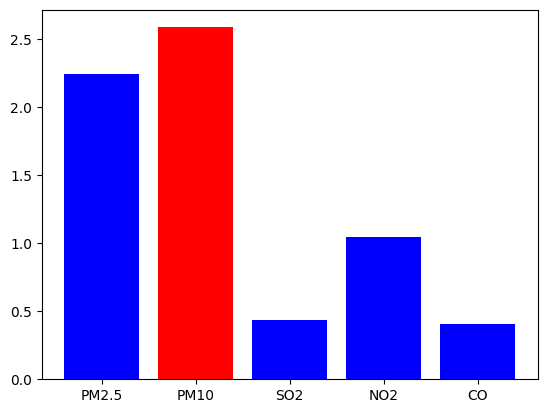

In [26]:
filtered_df = melted_df[melted_df['datetime'] == '2017-02-27']


colors = ["red" if i == filtered_df["value"].max() else "blue" for i in filtered_df["value"]]
plt.bar(x=filtered_df["pollutant"], height=filtered_df["value"], color=colors)

plt.show()



### Pertanyaan 2: Apa yang dapat dilakukan oleh masyarakat Dongsi untuk mengurangi pencemaran udara di wilayah nya?

Dikarenakan pada tanggal 2017-02-27 pollutant yang terbanyak adalah PM10. Masyarakat Kota Dongsi dapat menggunaan filter udara yang dapat menyaring partikel PM10

### Pertanyaan 3: Bagaimana kualitas udara di kota Dongsi dari waktu ke waktu?

#### Calculate AQI
The air quality can be measured with air quality index (AQI). To calculate the AQI, we can use  this equation: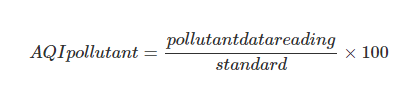

source: https://www.health.act.gov.au/about-our-health-system/population-health/environmental-monitoring/air-quality/measuring-air#:~:text=The%20AQI%20is%20calculated%20from,Ambient%20Air%20(NEPM)%20standard.

The normalized_df is actually pollutantdatareading/standard. So we can only multiply the normalized_df by 100

In [27]:
normalized_df = normalized_df.set_index('datetime')

aqi_df = normalized_df * 100
aqi_df.head(5)

,PM2.5,PM10,SO2,NO2,CO
datetime,,,,,
2013-03-01,18.333333,19.750000,16.583333,35.286458,9.739583
2013-03-02,87.142857,81.166667,53.107700,73.125000,24.164583
2013-03-03,280.952381,263.166667,87.955167,116.822917,53.321875
2013-03-04,69.404762,81.750000,33.023600,59.589552,20.833333
2013-03-05,440.714286,366.333333,108.861600,149.505208,59.994271


Now, we have the value of AQI pollutant for each pollutant. Next, we can get the mean of AQI pollutant per day and visualize that

In [28]:
mean = aqi_df.mean(axis=1)

aqi_df["mean"] = mean

aqi_df.head(5)

,PM2.5,PM10,SO2,NO2,CO,mean
datetime,,,,,,
2013-03-01,18.333333,19.750000,16.583333,35.286458,9.739583,19.938542
2013-03-02,87.142857,81.166667,53.107700,73.125000,24.164583,63.741361
2013-03-03,280.952381,263.166667,87.955167,116.822917,53.321875,160.443801
2013-03-04,69.404762,81.750000,33.023600,59.589552,20.833333,52.920249
2013-03-05,440.714286,366.333333,108.861600,149.505208,59.994271,225.081740


C:\Users\IBM-JTI\AppData\Local\Temp\ipykernel_20552\2775564702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_aqi_df['datetime'] = pd.to_datetime(filtered_aqi_df['datetime'])


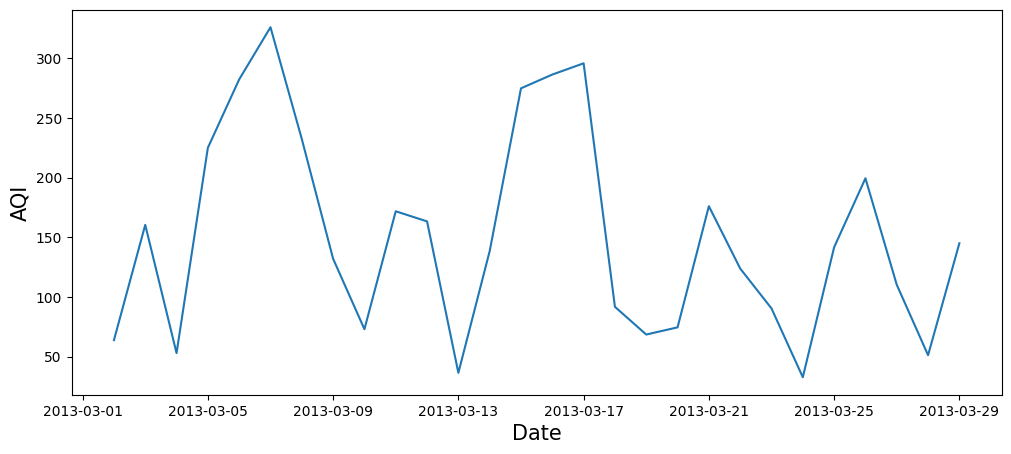

In [29]:
aqi_df = aqi_df.reset_index()
filtered_aqi_df = aqi_df[(aqi_df['datetime'] > '2013-03-01') & (aqi_df['datetime'] < '2013-03-30')]
filtered_aqi_df['datetime'] = pd.to_datetime(filtered_aqi_df['datetime'])

plt.figure(figsize=(12,5))
plt.plot(filtered_aqi_df['datetime'], filtered_aqi_df['mean'])

plt.xlabel('Date', size=15)
plt.ylabel('AQI', size=15)

plt.show()

Add day on the table so we can get the pattern more clearly

C:\Users\IBM-JTI\AppData\Local\Temp\ipykernel_20552\105646607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_aqi_df['day'] = filtered_aqi_df['datetime'].dt.day_name()


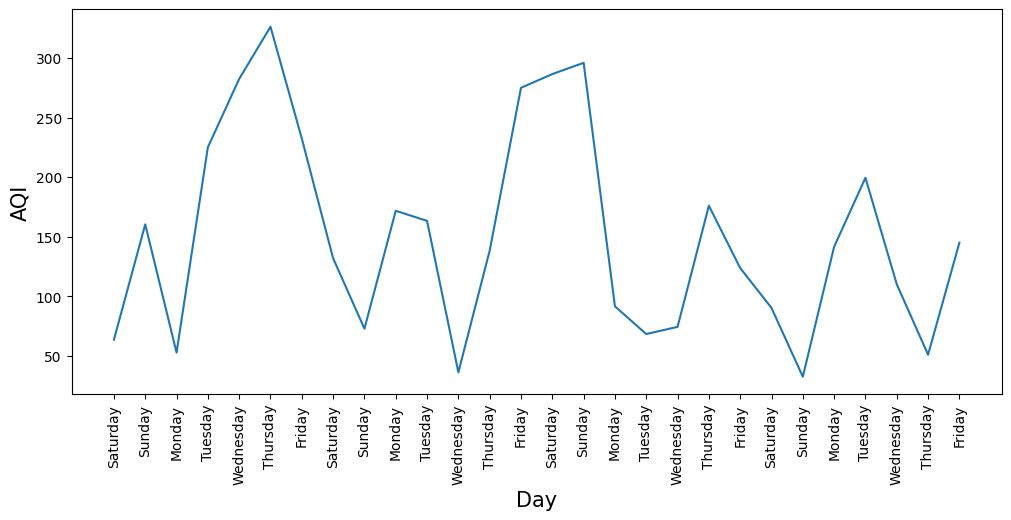

In [30]:
filtered_aqi_df['day'] = filtered_aqi_df['datetime'].dt.day_name()

plt.figure(figsize=(12,5))
plt.plot(filtered_aqi_df['datetime'], filtered_aqi_df['mean'])

plt.xlabel('Day', size=15)
plt.ylabel('AQI', size=15)
plt.xticks(filtered_aqi_df['datetime'], filtered_aqi_df['day'], rotation=90)

plt.show()

## Conclusion

- Conclution pertanyaan 1
  Penyebab terbesar pencemaran udara di Kota Dongsi pada **2017-02-27** adalah PM10
- conclution pertanyaan 2
  Yang dapat dilakukan warga Kota Dongsi untuk mengurangi PM10 di kotanya adalah dengan menggunakan filter udara yang dapat menyaring partikel PM10
- conclution pertanyaan 3
  Kualitas udara di Kota Dongsi dari waktu ke waktu sangat fluktuatif. Tidak terpengaruh oleh hari kerja maupun hari libur. hal ini dapat dilihat pada gambar dibawah
  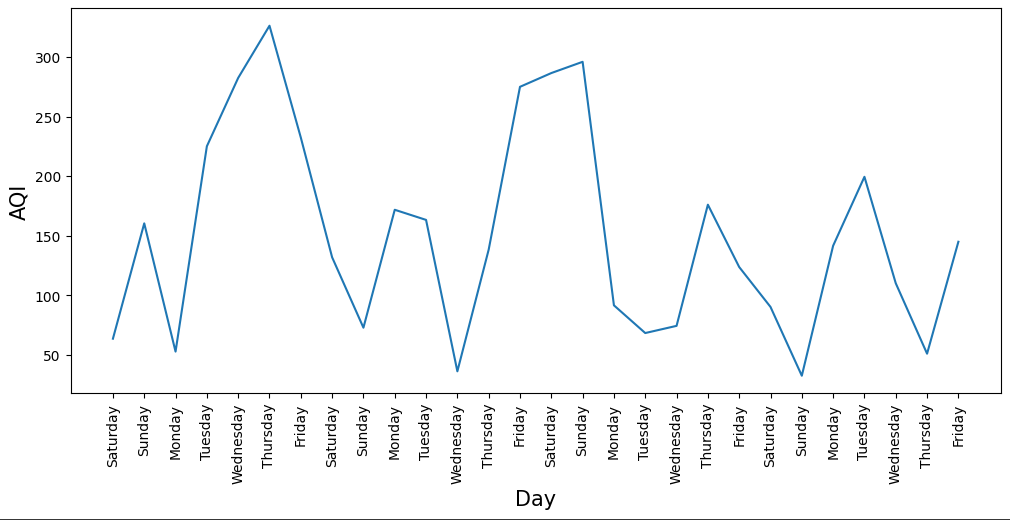

In [31]:
#import csv
normalized_df = normalized_df.reset_index()
normalized_df.to_csv("air_quality.csv", index=False)